# Visualization Exercise - State Crime
Authors: Brad Sheese and Mark Liffiton

---

NOTE: If you want to save your work select the following from the menu above:

**File  --> Save a copy in Drive**

If you work on the copy you made all changes will be saved to Google Drive. If you do not save your own copy, you can work in 'playground mode' instead, and any changes you make will be lost after you're done. 

In [ ]:
#@title Getting started? Execute this cell first.
#@markdown Click on the arrow to the left to execute this cell.

# set exercise name here
exercise_name = '09.0.3 Vis - State Crime'

import os
import sys
import math

tool_path = '/content/cs125_tools/'

if not os.path.exists(tool_path):
  ! git clone --quiet https://github.com/bsheese/cs125_tools.git

if tool_path not in sys.path:
  sys.path.append(tool_path)

import exercise_report_response

exercise_report_response.exercise_time_difficulty_report(exercise_name)

,Time
30 min or less,1%
31-60 min,18%
61-90 min,50%
91-120 min,18%
More than 2 hours,14%


,Difficulty
Very Easy,1%
Somewhat Easy,14%
Neutral,43%
Somewhat Difficult,32%
Very Difficult,10%


## Preliminaries: Imports and Dataframe Creation
We are going to be using the CORGIS state crime data set. Each row in the dataset represents one year and one U.S. state.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ignore this code entirely
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# read the data and create the dataframe
url = 'https://raw.githubusercontent.com/bsheese/CSDS125ExampleData/master/data_corgis_state_crime.csv'
df_original = pd.read_csv(url)
df = df_original[df_original['State'] != 'United States']

# read the data and create a supplemental dataframe
url_si = 'https://raw.githubusercontent.com/bsheese/CSDS125ExampleData/master/data_state_info.csv'
df_stateinfo = pd.read_csv(url_si)

# remove totals and just keep crime rates
column_mask = ~df.columns.str.contains('Totals')
df = df[df.columns[column_mask]]

#drop rows with empty values
df = df.dropna(axis=0, how='any')

# create a decade column
df['Decade'] = (df['Year']//10 * 10).astype(int)

# merge state crime data with supplemental state classification data 
df_stateinfo = df_stateinfo.reset_index()
df = pd.merge(df,df_stateinfo)

# normalize population for better plotting
df['Population_Mil'] = df['Population']/1000000 

#check dataframe
df.head(3)

,Population,Rates.Property.All,Rates.Property.Burglary,Rates.Property.Larceny,Rates.Property.Motor,Rates.Violent.All,Rates.Violent.Assault,Rates.Violent.Murder,Rates.Violent.Rape,Rates.Violent.Robbery,State,Year,Decade,index,State Code,Region,Division,Population_Mil
0,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5,Alabama,1960,1960,1,AL,South,East South Central,3.26674
1,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1,Alabama,1961,1960,1,AL,South,East South Central,3.30200
2,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5,Alabama,1962,1960,1,AL,South,East South Central,3.35800


## Problems: Examining State Crime in More Detail
Use what you've learned about Seaborn and your coding skills to create visualizations examining each of the following questions. There are multiple approaches to each problem that are reasonable. Think about what kind of visualization is appropriate to answer the question. Think about what kind of transformation you may need to make to the date to create the visualization. Then have at it. You may need to try a few different visualizations for each problem before you get something that you can interpret.  


### Problem 1
Is there a correlation between motor vehicle property crimes and murder rates?  If one was higher was the other generally higher as well?  Does one have lower rates if the other is higher?  Or is there no connection between the two?

Create a single visualization that allows you to answer these questions.

1. Associate the `Rates.Property.Motor` and `Rates.Violent.Murder` variables.
2. Consider whether you should change some parameters of the chart to make a more useful visualization (we've looked at some arguments that change how scatterplots and histograms are drawn, for example).
3. Properly label the x- and the y-axis -- look up the definitions of the columns to know exactly what units each variable uses, and make sure the axis labels communicate that.
4. Properly title your graph.
5. In a Markdown cell below your chart, explain what the chart tells us and what answers it provides to the questions above.

Text(0.5, 1.0, 'Motor theft rates vs Murder rates')

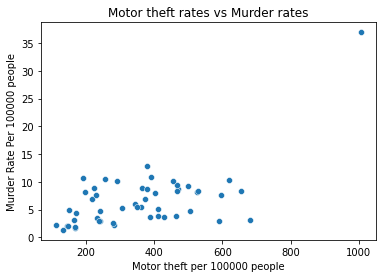

In [ ]:
# solution 1
group_df = df.groupby(by = 'State').mean()
group_df
sns.scatterplot (x = 'Rates.Property.Motor', y = 'Rates.Violent.Murder', data = group_df)
plt.xlabel('Motor theft per 100000 people')
plt.ylabel('Murder Rate Per 100000 people')
plt.title('Motor theft rates vs Murder rates')

My Conclusion: There is a very weak correlation between them. 

 

### Problem 2
How common are burglaries?  What are the most frequent annual rates of burglaries in the data set?  What have the highest and lowest rates been?

Create a single visualization that allows you to answer these questions.

1. Use the `Rates.Property.Burglary` column.
2. Consider whether you should change some parameters of the chart to make a more useful visualization (we've looked at some arguments that change how scatterplots and histograms are drawn, for example).
3. Properly label the x- and the y-axis -- look up the definitions of the columns to know exactly what units each variable uses, and make sure the axis labels communicate that.
4. Properly title your graph.
5. In a Markdown cell below your chart, explain what the chart tells us and what answers it provides to the questions above.

Text(0.5, 1.0, 'Burglary rates')

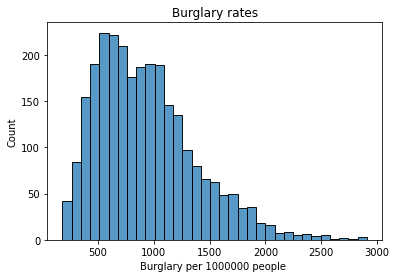

In [ ]:
# Write and test your code here.
sns.histplot(x = 'Rates.Property.Burglary', data = df)
plt.xlabel('Burglary per 1000000 people ')
plt.title('Distribution of burglary rates')



```
# This is formatted as code
```

My Conclusion:The burglary rates are common between the 500 - 1000. The most common is 500-600 and the lowest is between 2600-2700

[Delete this and enter your conclusion here.] 

### Problem 3
Create the same visualization as above, but looking at the `Rates.Property.Larceny` column instead (labels and titles should change as well).

Examining both visualizations, how do larceny rates compare to burglary rates?

In the markdown cell below your chart, describe how larceny rates compare to burglary rates.

Text(0.5, 1.0, 'Larceny Rates')

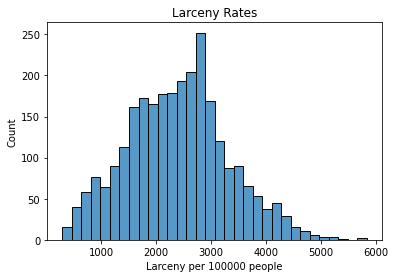

In [ ]:
# Write and test your code here.
sns.histplot(x = 'Rates.Property.Larceny', data = df)
plt.xlabel('Larceny per 100000 people')
plt.title('Larceny Rates')

My Conclusion: Larcheny is different from the Burglary because the most common is between 1400 - 3200 while for burglary the most common was between 500-1000. It shifted towards the right side. 

[Delete this and enter your conclusion here.] 

### Problem 4
Is there any consistency in property crime rate trends over time between different states?  When property crime has increased or decreased in one state, has it moved in a similar direction in another?

Create a single visualization that allows you to answer these questions for the specific states of Hawaii, Illinois, and New York.

1. Use the `Rates.Property.All` column and the `Year` column.
2. Properly label the x- and the y-axis -- look up the definitions of the columns to know exactly what units each variable uses, and make sure the axis labels communicate that.
3. Properly title your graph.
4. Include a legend with accurate labels for each data series.
5. In a Markdown cell below your chart, explain what the chart tells us and what answers it provides to the questions above.

Text(0.5, 1.0, 'ALL property related crimes in Hawaii, Illinois, and New York')

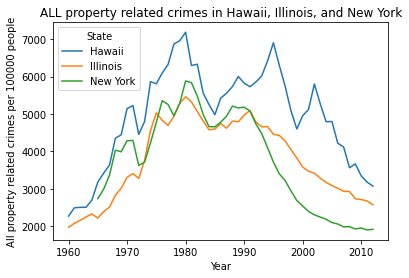

In [ ]:
# Write and test your code here.
state_mask = df.loc[:, 'State'].isin(['Hawaii', 'Illinois', 'New York'])
state_df = df.loc[state_mask]
sns.lineplot(x = 'Year', y  = 'Rates.Property.All', hue = 'State', data = state_df)
plt.ylabel('All property related crimes per 100000 people')
plt.title('ALL property related crimes in Hawaii, Illinois, and New York')


My Conclusion: There is a consistency between the three states. Yes, it has a similar direction in another. 

[Delete this and enter your conclusion here.] 

### Problem 5
Sometimes we want to directly compare one data series to several others, but we don't necessarily want them all in one chart.  For example, we might want to answer the same questions as Problem 4, but comparing Illinois to several other states, one at a time.

Create a *sequence* of **eight** visualizations that answers the same questions as Problem 3, with *each* chart comparing Illinois property crime over time to *one* state from this list:

- Alabama
- Alaska
- California
- Colorado
- Florida
- Georgia
- Hawaii
- Idaho

Do not do this by copying and pasting the same basic code 8 times. Use a loop or a different approach to complete this problem.

Also, make sure that the title and legend is correct (indicates the correct states) in each individual chart. For example, the first chart's title should be "Comparison of Property Crime Rates Over Time in Illinois and Alabama". Again, do not 'hard code' your solution by making individual titles for each one. Use string formatting to solve the problem.

Remember, your code should create **eight** separate charts.

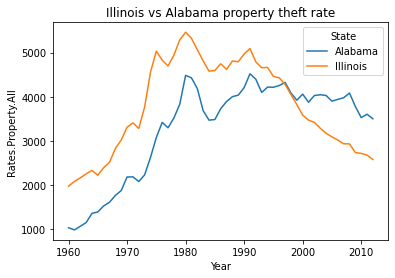

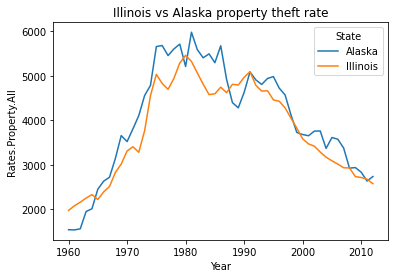

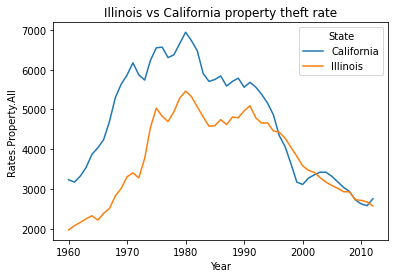

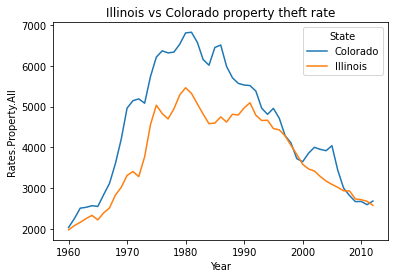

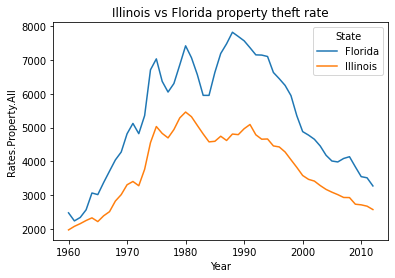

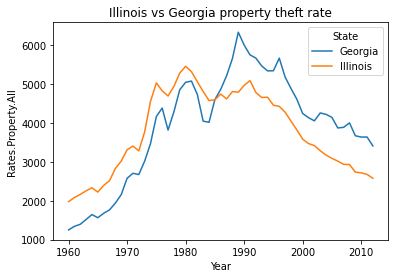

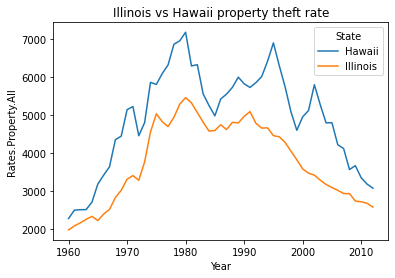

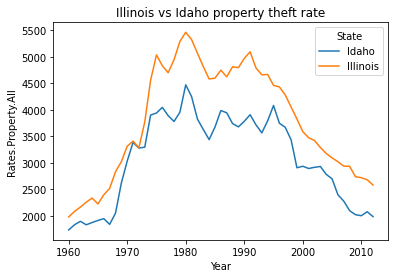

In [ ]:
# Write and test your code here.
illinois_mask = df.loc[:, 'State'].isin(['Illinois'])
states_list = ['Alabama', 'Alaska', 'California', 'Colorado', 'Florida', 'Georgia', 'Hawaii', 'Idaho']
for state in states_list: 
  states_mask = df.loc[:, 'State'] == state
  df_mask = df.loc[illinois_mask|states_mask]
  sns.lineplot(x = 'Year', y = 'Rates.Property.All', data = df_mask, hue = 'State') 
  plt.title('Illinois vs {} property theft rate'.format(state))
  plt.show()


### Problem 6

Each state's crime rates vary over time, but every type of crime for every state will have a "high point," a maximum value across all of the years of data.  For each state, we can find the maximum value a particular crime rate hits as one way of "summarizing" the data for that state.  (We could also calculate the minimum value, the average value, the median, etc., but here we'll just look at the maximum.)

Generate a **bar chart** comparing the maximum total violent crime rate for every state in the dataset.
1. Group the data by the `State` column.
2. Find the **maximum** value for each column within each group.
3. Chart values in the `Rates.Violent.All` column (after finding the maximum values).
4. Properly label the x- and the y-axis -- look up the definitions of the columns to know exactly what units each variable uses, and make sure the axis labels communicate that.
5. Properly title your graph.

Text(0.5, 1.0, 'Violent rate in all the states in US')

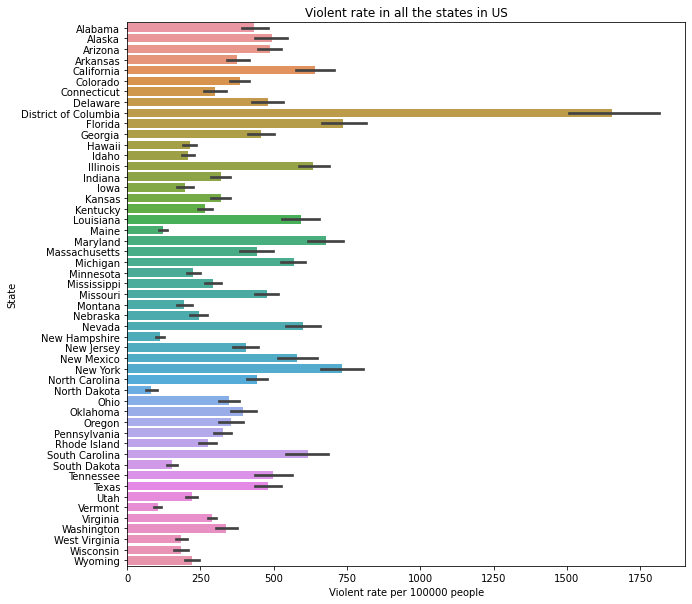

In [ ]:
# enter and test your code here
state_group_df = df.groupby(by = 'State').max()
state_group_df
plt.figure(figsize=(10,10))
sns.barplot(x = 'Rates.Violent.All', y = 'State', data = df )
plt.xlabel('Violent rate per 100000 people')
plt.title('Violent rate in all the states in US')
# create the groupby object, grouped by state using the max value 

# groupby moves the state into the index, we will make it back into a column



If everything worked, the chart you produced will probably be unintelligible.  51 labels across the x-axis (because D.C. is included as well) just doesn't work here.

There are a few ways to improve this.  One way is to make a **horizontal** bar chart.

Make a horizontal bar chart of the same information.  To provide enough space for the labels, increase the height of the chart a bit by including the following line **before** any calls to any other `plt.` methods:
```python
plt.figure(figsize=(10,10))
```

In [ ]:
# enter and test your code here



That should be much more readable than the first bar chart.

There should be one large outlier in this data, with a maximum violent crime rate well above any of the others.  In the Markdown cell below, interpret this data point and describe exactly what that bar communicates.

My Conclusion: It means it has the highest violent rate. 

[Delete this and enter your conclusion here.] 

After you finish your conclusion, [read this to get a bit more insight](https://en.wikipedia.org/wiki/Crime_in_Washington,_D.C.) into some of issues behind the datapoint.

____

In [ ]:
#@title Completed the exercise? 
#@markdown Click on the arrow to the left to create the response form.

import sys
if 'exercise_report_response' not in sys.modules:
  print('Please execute the "Getting Started" cell at the beginning of this exercise, then rerun this cell.')
else:
  exercise_report_response.display_form(exercise_report_response.er_question_list)

If this form does not display correctly in Colab, select "Runttime" from the menu at the top, then select "Restart and run all"
Your first name:


Text(value='', placeholder='Enter your first name here')


Your last name:


Text(value='', placeholder='Enter your last name here')


How difficult was the exercise?


ToggleButtons(button_style='warning', index=2, options=('Very Easy', 'Somewhat Easy', 'Neutral', 'Somewhat Dif…


How long did it take you to complete the exercise?


ToggleButtons(button_style='warning', index=2, options=('30 min or less', '31-60 min', '61-90 min', '91-120 mi…


What tools (or concepts) used in this exercise do you feel confident with?


Textarea(value='', placeholder='Enter your response here')


What tools (or concepts) do you still need practice with?


Textarea(value='', placeholder='Enter your response here')


What suggestions do you have for improving the exercise?


Textarea(value='', placeholder='Enter your response here')


What corrections should be made (typos. etc)?


Textarea(value='', placeholder='Enter your response here')


Share your notebook.
Select 'Share' at the top of the screen. Then select 'Get Link'.
Change the Link so anyone can view it.
Click 'Copy Link', then 'Done'. Paste the link here.


Textarea(value='', placeholder='Enter your response here')

In [ ]:
#@title Ready to Submit?
#@markdown If you have completed the exercise and the exercise response:
#@markdown * check the box 'Ready' box below 
#@markdown * execute this cell

Ready = False #@param {type:"boolean"}

try:
  if Ready == True:
    exercise_report_response.submit_exercise_response(exercise_name, exercise_report_response.er_question_list)

  else:
    print('NOT SUBMITTED!!!')
    print('Check the ready box if you are ready to submit your response.')

except:
  print('NOT SUBMITTED!!!')
  print('Execute the cell above to create the form.')